## Imports

In [1]:
import pandas as pd
from pingouin import rcorr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from utils.formatting import normalize_string, get_formula

## Loading Files

In [ ]:
df_student = pd.read_csv("datasets/student_performance.csv")

In [ ]:
# Formatting DataFrame columns to simplify interactions
df_student.columns = normalize_string(df_student.columns)

In [ ]:
# Inspecting DataFrame structure
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  object 
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Descriptive statistics

In [ ]:
# Numeric variables
df_student.describe()

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# non-numeric variables
df_student.select_dtypes(include=object).describe()

,extracurricular_activities
count,10000
unique,2
top,No
freq,5052


In [5]:
rcorr(
    df_student,
    method="pearson",
    upper="pval",
    stars=True,
    pval_stars={0.01: "***", 0.05: "**", 0.1: "*"},
)

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
hours_studied,-,,,*,***
previous_scores,-0.012,-,,,***
sleep_hours,0.001,0.006,-,,***
sample_question_papers_practiced,0.017,0.008,0.004,-,***
performance_index,0.374,0.915,0.048,0.043,-


Text(0.5, 1.0, 'Correlation Matrix')

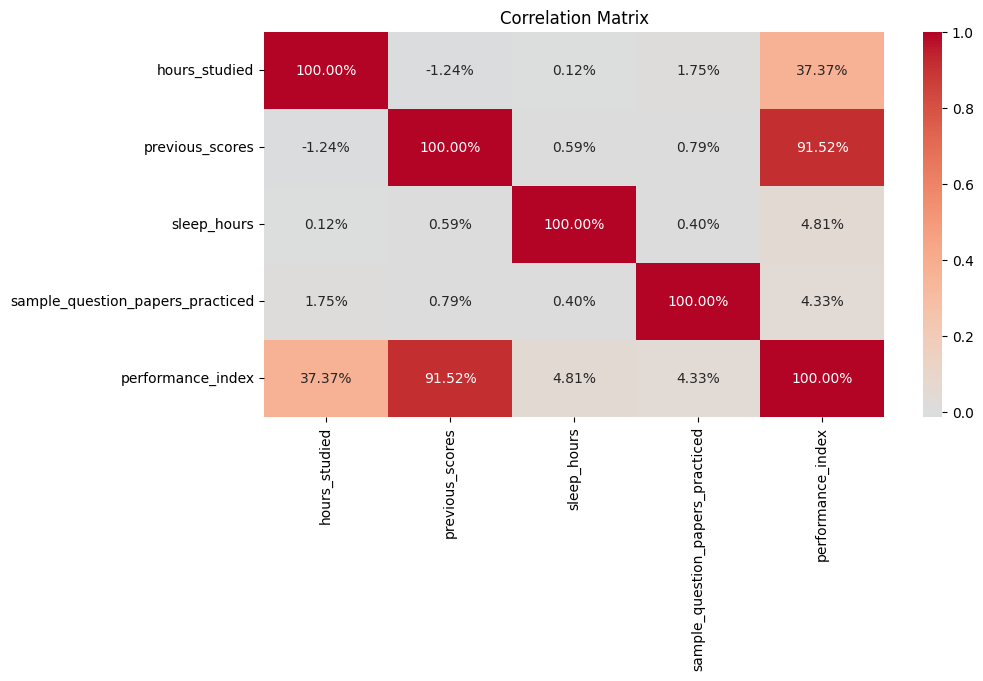

In [39]:
plt.figure(figsize=(10, 5), dpi=100)

corr_matrix = df_student.select_dtypes(exclude=object).corr()

ax = sns.heatmap(
    data=corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=corr_matrix.map(lambda x: f"{x:.2%}"),
    fmt="",
    annot_kws={"size":10}
)

plt.title("Correlation Matrix", fontsize=12)

## OLS Model

In [ ]:
formula = get_formula(df_student, endog="performance_index")

print(formula)

performance_index ~ hours_studied + previous_scores + extracurricular_activities + sleep_hours + sample_question_papers_practiced


In [14]:
model = smf.ols(data=df_student, formula=formula).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      performance_index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:57:08   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -34.0756      0.127   -268.010      0.000     -34.325     -33.826
extracurricular_activities[T.Yes]     0.6129      0.041     15.029      0.000       0.533       0.693
hours_studied                         2.8530      0.008    362.353      0.000       2.838       2.868
previous_scores                       1.0184      0.001    866.450      0.000       1.016       1.021
sleep_hours                           0.4806      0.012     39.972      0.000       0.457       0.504
sample_question_papers_practiced      0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### TODO: Add analysis

## Diagnosis

Text(0.5, 1.0, 'Model residuals distribution')

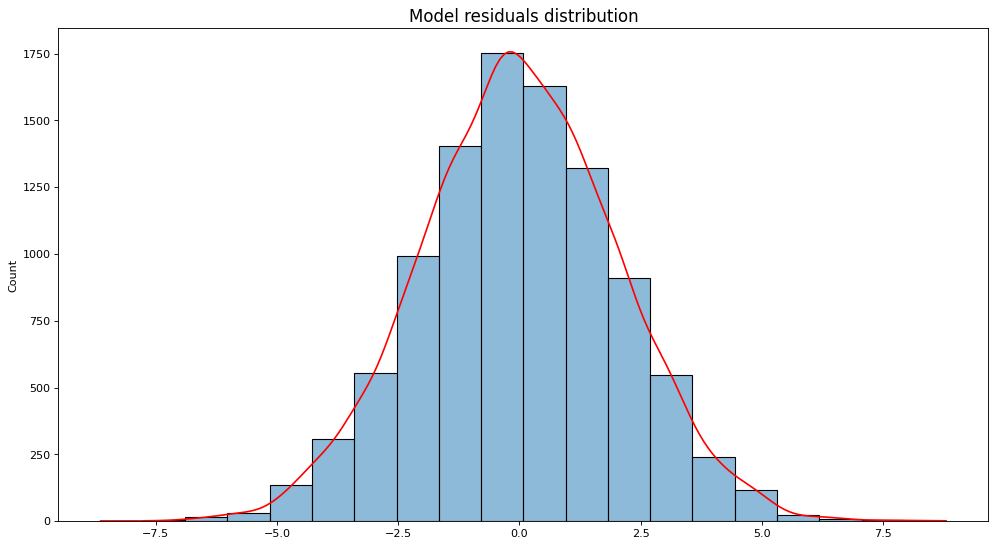

In [41]:
plt.figure(figsize=(15,8), dpi=80)

sns.histplot(
    data=model.resid,
    bins=20,
    kde=True,
).lines[0].set_color("red")


plt.title("Model residuals distribution", size=15)